In [1]:
import pandas as pd
import sklearn
import numpy as np

In [2]:
#read in data
pd.set_option('display.max_columns', None)  
p = pd.read_csv("personality_train.csv")
p

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,ecbddbfe00e0f83cfdb802a7186061c7,"is stuck on Band-Aid brand, cuz Band-Aid's stu...",4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,12/31/09 10:42 PM,739,267574.00,98.39,0.01,270029,0.50,0.07
1,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,12/25/09 06:18 PM,180,14861.60,93.29,0.03,15661,0.49,0.10
2,db39f7b2aad360b1033ec1f8fcd57f9c,Back from vacation and tired,4.65,3.20,3.05,3.65,4.75,y,y,n,y,y,12/17/09 02:46 PM,102,4359.80,86.33,0.09,4668,0.46,0.36
3,4d035bd3fd8d9595d15cea9e388964be,had a great day at church...,3.70,2.90,3.40,3.35,4.05,y,y,n,n,y,11/20/09 01:35 AM,57,1509.50,98.02,0.05,1522,0.49,0.03
4,5489ed38556af050d6a93e5d27b95dfb,"fie! Time, Inc. has blocked gchat... does this...",4.15,3.10,3.20,3.60,3.80,y,y,n,y,y,11/15/09 04:16 PM,950,438219.00,97.42,0.01,445454,0.50,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,a764ca41dca158d7a191505dcc8ce47f,Red,3.70,2.50,4.20,4.10,3.60,y,n,y,y,n,01/12/10 07:48 PM,451,98153.10,97.16,0.02,99733,0.49,0.12
168,deb899e426c1a5c66c24eeb0d7df6257,"About mornings and winter,and magic.",2.15,2.15,4.10,2.90,4.60,n,n,y,n,y,01/11/10 04:19 AM,36,185.71,31.21,0.40,377,0.32,0.63
169,ea28a927cb6663480ea33ca917c3c8ba,is wishing it was Saturday.,4.05,3.35,3.80,3.95,4.50,y,y,y,y,y,01/09/10 01:01 AM,83,2935.76,88.40,0.08,3120,0.47,0.26
170,5532642937eb3497a43e15dbb23a9d2d,snipers get more head,1.40,4.05,3.30,3.40,3.95,n,y,n,n,y,01/08/10 01:50 AM,154,11424.50,98.25,0.02,11510,0.49,0.05


In [3]:
#setup features and labels for the tree
#dependent variables (needed for sorting output later)
labels = p['cNEU']
labels

0      n
1      y
2      y
3      y
4      y
      ..
167    n
168    n
169    y
170    y
171    y
Name: cNEU, Length: 172, dtype: object

In [4]:
#features/independent variables
features = ["NETWORKSIZE","BETWEENNESS","NBETWEENNESS","DENSITY","BROKERAGE","NBROKERAGE","TRANSITIVITY","sEXT","sAGR","sCON","sOPN"]
#features = ["NETWORKSIZE","BETWEENNESS","NBETWEENNESS","DENSITY","BROKERAGE","NBROKERAGE","TRANSITIVITY"]
#features = ["sEXT","sAGR","sCON","sOPN"]
features

['NETWORKSIZE',
 'BETWEENNESS',
 'NBETWEENNESS',
 'DENSITY',
 'BROKERAGE',
 'NBROKERAGE',
 'TRANSITIVITY',
 'sEXT',
 'sAGR',
 'sCON',
 'sOPN']

In [5]:
#get dataframe of just features
#get all rows and just the columns that match our features
X = p.loc[:,features]
X

,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY,sEXT,sAGR,sCON,sOPN
0,739,267574.00,98.39,0.01,270029,0.50,0.07,4.30,3.60,3.30,4.10
1,180,14861.60,93.29,0.03,15661,0.49,0.10,2.65,3.15,3.25,4.40
2,102,4359.80,86.33,0.09,4668,0.46,0.36,4.65,3.05,3.65,4.75
3,57,1509.50,98.02,0.05,1522,0.49,0.03,3.70,3.40,3.35,4.05
4,950,438219.00,97.42,0.01,445454,0.50,0.09,4.15,3.20,3.60,3.80
...,...,...,...,...,...,...,...,...,...,...,...
167,451,98153.10,97.16,0.02,99733,0.49,0.12,3.70,4.20,4.10,3.60
168,36,185.71,31.21,0.40,377,0.32,0.63,2.15,4.10,2.90,4.60
169,83,2935.76,88.40,0.08,3120,0.47,0.26,4.05,3.80,3.95,4.50
170,154,11424.50,98.25,0.02,11510,0.49,0.05,1.40,3.30,3.40,3.95


In [6]:
#setup plot for the confusion matrix and decision tree
import matplotlib.pyplot as plt
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]


In [7]:
#setup figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

In [8]:
#output/labels once more for naming
Y = p["cNEU"]
Y

0      n
1      y
2      y
3      y
4      y
      ..
167    n
168    n
169    y
170    y
171    y
Name: cNEU, Length: 172, dtype: object

In [9]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, Y)

In [10]:
sorted = labels.unique()
sorted = np.sort(sorted)
sorted = list(map(str, sorted))
sorted

['n', 'y']

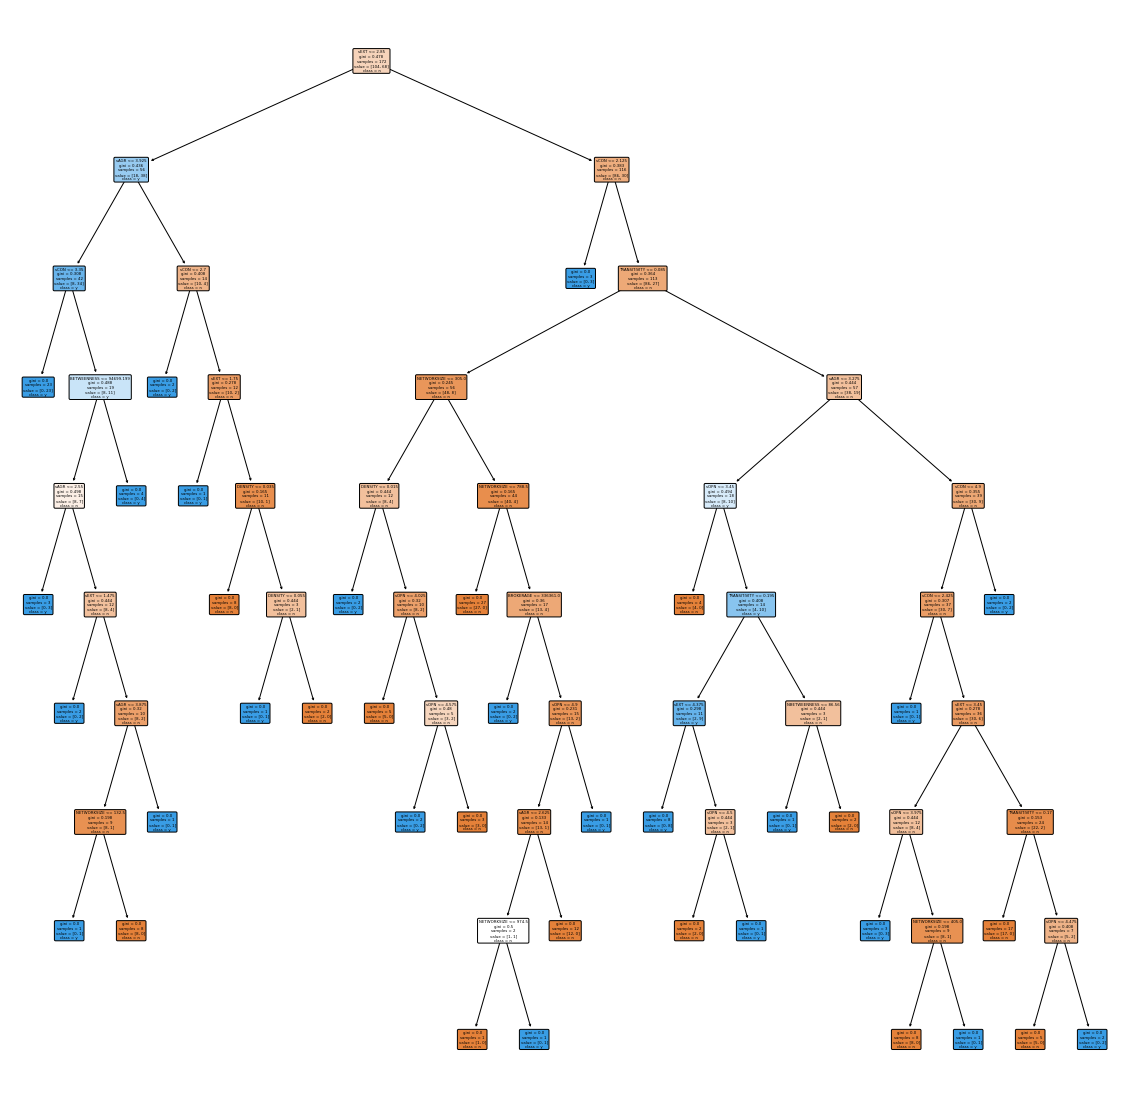

In [11]:
from pandas.plotting import scatter_matrix
#x = tree.plot_tree(clf,feature_names=features,class_names=labels.astype(str),rounded=True,filled=True) 
x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features) 
plt.savefig('out.pdf')

In [12]:
testData = pd.read_csv("personality_test.csv")
testData

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,200255966ca6e2636535b5b93ac04497,Four day camping trip!!! Holy Crap! this is go...,3.15,1.90,4.15,4.00,3.55,n,n,y,y,n,12/29/09 12:42 AM,75,2650.67,98.14,0.04,2660,0.49,0.05
1,527ed53d2ba3a3bc417b8402d5b2f556,put in work again last night at the Pig N Whis...,3.35,2.75,2.85,3.10,4.15,n,n,n,n,y,12/25/09 04:47 PM,789,303058.00,97.74,0.01,307565,0.50,0.07
2,318bf822d4f2bd3920367560218619c0,has bed bugs..... ewwwww!,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,12/23/09 10:06 PM,318,49024.80,97.88,0.02,49584,0.49,0.06
3,2badb47503a98766c89e266d1130969a,NYC on 8//18!!!!!!!!,3.55,2.30,3.65,4.65,4.60,n,n,y,y,y,12/08/09 01:27 AM,379,66420.90,93.22,0.03,69191,0.49,0.27
4,1c10cc0852579d2fa000e3fc3327bb98,"for the united fans reading, dont worry be hap...",2.60,2.65,2.10,2.20,3.50,n,n,n,n,n,12/06/09 08:40 PM,139,9100.53,96.27,0.04,9251,0.49,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,06b055f8e2bca96496514891057913c3,is enjoying the cricket...comfy boxers and rai...,2.85,2.35,3.35,4.70,3.35,n,n,n,y,n,06/16/09 06:22 AM,194,18123.10,97.81,0.02,18313,0.49,0.06
70,138ac63ec2b55b8f48fd19c300720cae,Can anyone out there tell me if Jesus was EVER...,1.95,3.45,3.05,2.50,3.95,n,y,n,n,y,06/15/09 11:54 PM,415,84621.10,98.98,0.01,84969,0.50,0.04
71,3fe44fab3eb561ae418a22182ec75fad,Debating on whether or not to drink...alcohol...,4.00,3.75,3.25,2.00,3.75,y,y,n,n,n,02/15/10 03:36 AM,329,49454.70,92.22,0.03,52282,0.49,0.17
72,3fe44fab3eb561ae418a22182ec75fad,is really into the Cocteau Twins and Depeche M...,4.00,3.75,3.25,2.00,3.75,y,y,n,n,n,02/12/10 10:47 PM,329,49454.70,92.22,0.03,52282,0.49,0.17


In [13]:
XTest = testData.loc[:,features]
XTest

,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY,sEXT,sAGR,sCON,sOPN
0,75,2650.67,98.14,0.04,2660,0.49,0.05,3.15,4.15,4.00,3.55
1,789,303058.00,97.74,0.01,307565,0.50,0.07,3.35,2.85,3.10,4.15
2,318,49024.80,97.88,0.02,49584,0.49,0.06,4.50,3.00,4.50,3.75
3,379,66420.90,93.22,0.03,69191,0.49,0.27,3.55,3.65,4.65,4.60
4,139,9100.53,96.27,0.04,9251,0.49,0.11,2.60,2.10,2.20,3.50
...,...,...,...,...,...,...,...,...,...,...,...
69,194,18123.10,97.81,0.02,18313,0.49,0.06,2.85,3.35,4.70,3.35
70,415,84621.10,98.98,0.01,84969,0.50,0.04,1.95,3.05,2.50,3.95
71,329,49454.70,92.22,0.03,52282,0.49,0.17,4.00,3.25,2.00,3.75
72,329,49454.70,92.22,0.03,52282,0.49,0.17,4.00,3.25,2.00,3.75


In [14]:
YTest = testData["cNEU"]
YTest

0     n
1     n
2     y
3     n
4     n
     ..
69    n
70    y
71    y
72    y
73    y
Name: cNEU, Length: 74, dtype: object

In [15]:
#make predictions on test data 
YPredicted = clf.predict(XTest)
YPredicted

array(['n', 'y', 'n', 'y', 'y', 'n', 'n', 'n', 'y', 'y', 'y', 'n', 'n',
       'n', 'n', 'y', 'n', 'n', 'y', 'y', 'n', 'y', 'y', 'y', 'n', 'n',
       'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'y', 'y',
       'n', 'n', 'n', 'n', 'y', 'y', 'y', 'n', 'n', 'y', 'n', 'y', 'n',
       'y', 'y', 'y', 'n', 'y', 'y', 'n', 'y', 'n', 'n', 'y', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'y', 'y', 'y', 'y'], dtype=object)

In [16]:
YTest

0     n
1     n
2     y
3     n
4     n
     ..
69    n
70    y
71    y
72    y
73    y
Name: cNEU, Length: 74, dtype: object

In [17]:
from sklearn import metrics
accuracy = metrics.accuracy_score(YTest,YPredicted)
accuracy

0.6486486486486487

[30.0, 5.0]
[[30 14]
 [12 18]]


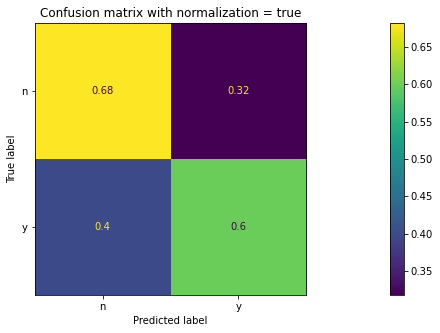

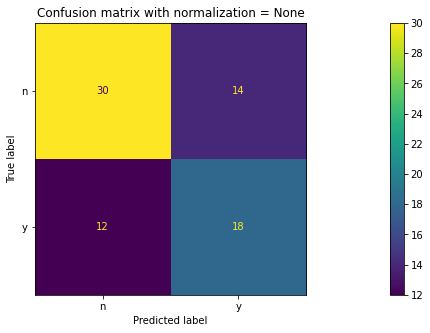

In [18]:
#setup plots for confusion matrix
from sklearn.metrics import plot_confusion_matrix as matrix
figSize = plt.rcParams["figure.figsize"]
figSize[0] = 30
figSize[1] = 5
plt.rcParams["figure.figsize"]=figSize
print(plt.rcParams.get('figure.figsize'))

#plot the confusion matrices 1 for normalzied the other un-normalized
values = ['true',None]
#cmap='cividis'
for x in values:
    disp = matrix(clf,XTest,YTest,display_labels=sorted,normalize=x)
    disp.ax_.set_title("Confusion matrix with normalization = "+str(x))
print(disp.confusion_matrix)

In [19]:
#get false positives
#pd.set_option('display.max_rows',100)
testData[(YTest!=YPredicted)&(YPredicted=="y")]

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
1,527ed53d2ba3a3bc417b8402d5b2f556,put in work again last night at the Pig N Whis...,3.35,2.75,2.85,3.10,4.15,n,n,n,n,y,12/25/09 04:47 PM,789,303058.00,97.74,0.01,307565,0.50,0.07
3,2badb47503a98766c89e266d1130969a,NYC on 8//18!!!!!!!!,3.55,2.30,3.65,4.65,4.60,n,n,y,y,y,12/08/09 01:27 AM,379,66420.90,93.22,0.03,69191,0.49,0.27
4,1c10cc0852579d2fa000e3fc3327bb98,"for the united fans reading, dont worry be hap...",2.60,2.65,2.10,2.20,3.50,n,n,n,n,n,12/06/09 08:40 PM,139,9100.53,96.27,0.04,9251,0.49,0.11
8,526ac2635cb3f5e0ee5d7424e83e9107,A vegetarian delight,2.45,2.70,3.10,4.00,4.30,n,n,n,y,y,10/29/09 06:04 AM,633,196606.00,98.60,0.01,198186,0.50,0.07
9,370a8295df2f8b9069e75422c37d2639,IS SOOOOOO EXCITED 4 THE HOLS,4.00,1.65,3.10,3.10,4.50,y,n,n,n,y,10/22/09 03:15 AM,89,3755.17,98.10,0.03,3804,0.50,0.02
19,225c97c90103cc04cda7d10845f2733e,has been asked by several friends about our tr...,2.70,1.45,3.80,4.35,3.30,n,n,y,y,n,08/24/09 12:30 PM,102,4216.48,83.49,0.09,4694,0.46,0.32
22,1bd281623fa6ad208caa394dcad75c7d,Nothing to do in lab because the TAs messed up...,2.10,2.70,3.40,2.05,3.65,n,n,n,n,n,08/15/09 04:35 PM,573,154659.00,94.70,0.02,160407,0.49,0.18
23,0bfa3d952ffed50f25011b128e73a820,is glad *PROPNAME* has taken responsibility fo...,2.80,1.60,3.65,3.25,4.15,n,n,y,n,y,08/09/09 10:59 PM,463,103722.00,97.40,0.02,105113,0.49,0.13
37,3b474abc02985674f2b64e46a939bb3d,Me + Exams = Epic Phail ~.~,3.60,1.95,4.20,3.60,4.80,y,n,y,y,y,07/10/09 09:43 PM,804,312739.00,97.12,0.01,321175,0.50,0.01
38,301e1788a595203d0daf3fed10afe1c9,Its way to early on a Saturday to be heading t...,3.00,2.50,4.00,3.50,3.75,n,n,y,y,n,07/10/09 02:33 PM,493,115837.00,95.90,0.02,118848,0.49,0.12


In [20]:
#get false negative
#pd.set_option('display.max_rows',100)
testData[(YTest!=YPredicted)&(YPredicted=="n")]

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
2,318bf822d4f2bd3920367560218619c0,has bed bugs..... ewwwww!,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,12/23/09 10:06 PM,318,49024.80,97.88,0.02,49584,0.49,0.06
7,172400f46880b309ca5e97d322bb8f01,"I have no excuses, least of all for God. Like...",3.45,2.85,2.80,2.70,4.15,n,y,n,n,y,11/18/09 04:56 AM,122,6529.30,89.94,0.07,6893,0.47,0.26
12,450c787001b004af69428e267c7a4ca1,"Writing, then 2 chapters homework, then bed. O...",2.30,3.50,4.50,2.85,4.50,n,y,y,n,y,09/25/09 09:53 AM,297,41728.80,95.58,0.03,42826,0.49,0.17
14,4cac659f923d6f3b4605f38477a04458,I have no water right now. WHY,2.80,3.15,3.65,3.45,4.35,n,y,y,n,y,09/20/09 12:06 AM,340,53444.20,93.29,0.03,55628,0.49,0.26
17,448084546d4ae45e47c3a83f338ade56,ive come to the conclusion that some people ar...,3.70,3.15,4.30,3.75,3.85,y,y,y,y,y,08/31/09 05:03 AM,216,21645.00,94.09,0.03,22428,0.49,0.15
25,259f8f9cce95b214dc9924af48bcd6f0,is back from D.C. and is very tired...,3.30,2.85,4.20,3.40,4.75,n,y,y,n,y,08/06/09 07:35 PM,1460,1056550.00,99.34,0.00,1060480,0.50,0.03
30,03e6c4eca4269c183fa0e1780f73faba,"""Those who criticize our generation forget who...",3.20,3.60,3.85,4.35,4.80,n,y,y,y,y,07/23/09 05:55 PM,222,21894.70,90.06,0.04,23462,0.48,0.21
31,3cc2cbf4c8c9c9f05590a092a9e9cacb,"Damn, U.S. beat Spain? We should be proud",2.75,3.75,3.75,4.75,4.25,n,y,y,y,y,07/19/09 05:40 PM,332,51669.80,94.61,0.03,53479,0.49,0.18
39,1187ed8a8b100eb49b8684ac30d6da29,why does it seem like im always online these d...,4.00,4.00,2.25,4.50,3.25,y,y,n,y,n,07/09/09 07:16 PM,631,192351.00,97.08,0.02,195496,0.49,0.14
41,4a6ef0fc11285732bde96e8863dcb7f4,just made amazing pineapple curry jasime rice!...,3.80,3.00,3.94,3.10,4.75,y,y,y,n,y,07/08/09 05:01 PM,622,188741.00,98.04,0.01,190791,0.50,0.11
